In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## Data Gathering

In [7]:
df=pd.read_csv(r"E:\4feb\diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,102,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [9]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.308594,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.998145,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,102.000000,1.000000


In [10]:
iqr=142.000000-99.000000
iqr

43.0

In [11]:
upper_tail=142+1.5*iqr
lower_tail=99-1.5*iqr
print(upper_tail)
print(lower_tail)

206.5
34.5


<AxesSubplot:>

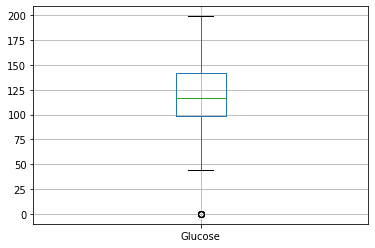

In [12]:
df[["Glucose"]].boxplot()

In [13]:
iqr=80-62
iqr

18

In [15]:
upper_tail=80+1.5*iqr
lower_tail=62-1.5*iqr
print(upper_tail)
print(lower_tail)

107.0
35.0


<AxesSubplot:>

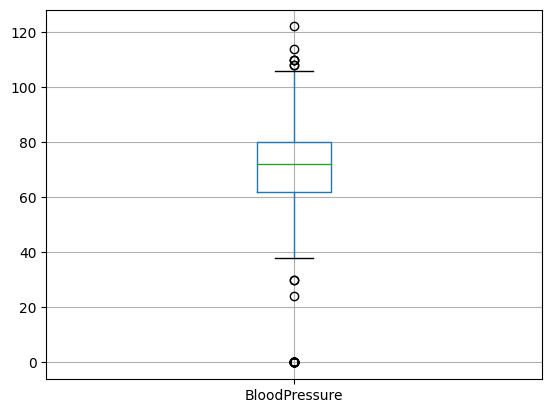

In [16]:
df[["BloodPressure"]].boxplot()

<AxesSubplot:>

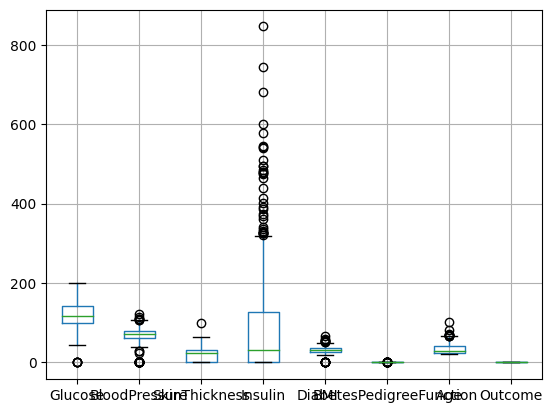

In [17]:
df.boxplot()

In [18]:
## check target column is having balance data or not

In [19]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

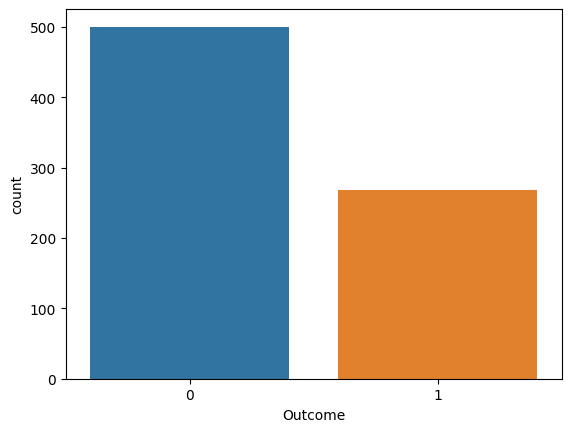

In [20]:
sns.countplot(x=df["Outcome"])

In [21]:
## Train test split

In [23]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]
x
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3,stratify=y)

In [25]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
439,107,88,0,0,36.8,0.727,31
162,114,80,34,285,44.2,0.167,27
636,104,74,0,0,28.8,0.153,48
4,150,40,35,168,43.1,2.288,33
445,180,78,63,14,59.4,2.420,25
...,...,...,...,...,...,...,...
326,122,64,32,156,35.1,0.692,30
421,94,68,18,76,26.0,0.561,21
519,129,90,7,326,19.6,0.582,60
417,144,82,32,0,38.5,0.554,37


In [26]:
y_train

439    0
162    0
636    0
4      1
445    1
      ..
326    1
421    0
519    0
417    1
265    0
Name: Outcome, Length: 537, dtype: int64

In [27]:
## Model Training

In [28]:
log_clf=LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

In [29]:
## Model Evalution

In [30]:
## Testing Data 

In [31]:
y_pred=log_clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [32]:
y_test[5:10]

282    0
762    0
760    0
443    1
418    0
Name: Outcome, dtype: int64

In [33]:
y_pred[5:10]

array([0, 0, 0, 0, 0], dtype=int64)

In [34]:
y_test[15:20]

204    0
736    0
86     0
524    0
313    0
Name: Outcome, dtype: int64

In [35]:
y_pred[15:20]

array([0, 0, 0, 0, 0], dtype=int64)

In [36]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[133,  17],
       [ 40,  41]], dtype=int64)

In [ ]:
TP   FP
FN   TN
 1datapoint
    
TP:acutal class 1 and predicated class is 1
FP:acutal class 0 and predicated class is 1   A
FN:acutal class 1 and predicated class is 0   B
TN:acutal class 0 and predicated class is 0

In [38]:
#Precision:precision means out of total +ve values, How many values are actual +ve
#PR= TP/TP+FP
#Recall=TP/TP+FN

In [42]:
clf_report=classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       150
           1       0.71      0.51      0.59        81

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



In [44]:
133/(133+17)
#PR= TP/TP+FP
#Recall=TP/TP+FN

0.8866666666666667

In [ ]:
([[133,  17],
       [ 40,  41]]

In [45]:
# Testing Data Evaluation
y_pred=log_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print(cnf_matrix)

acc_score=accuracy_score(y_test,y_pred)
print(acc_score)

clf_report=classification_report(y_test,y_pred)
print(clf_report)

[[133  17]
 [ 40  41]]
0.7532467532467533
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       150
           1       0.71      0.51      0.59        81

    accuracy                           0.75       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



In [46]:
# Traing Data Evaluation
y_pred_train=log_clf.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred_train)
print(cnf_matrix)

acc_score=accuracy_score(y_train,y_pred_train)
print(acc_score)

clf_report=classification_report(y_train,y_pred_train)
print(clf_report)

[[312  38]
 [ 78 109]]
0.7839851024208566
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       350
           1       0.74      0.58      0.65       187

    accuracy                           0.78       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.78      0.78       537

